<html>
    <div style="padding: 50px; background-color: lightskyblue; text-align: center; color: #000;">
        <h1>CAB420 Workshop - Week 2 Practical</h1>
        <h2>Ridge and LASSO Regression</h2>
    </div>
</html>

In [59]:
# Importing the libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from datetime import datetime

# Importing the datasets
combined_cyclist_data = pd.read_csv('data/combined.csv')

# Problem 1 - Overfitting Linear Regression

In the week 1 practical, you developed a model to predict cyclist counts at a single counter. Using the same data and starting from the initial model before terms were removed, overcomplicate it such that it overfits to the training data. The easiest way to do this is by including a large number of higher order (i.e. interaction, quadratic and higher order polynomial) terms. Verify that the model has overfit through evaluating on the validation and testing datasets, and compare it’s performance to the simple model that you started with.

## Installing Packages and Loading in the Dataset

In [60]:
combined_data = pd.read_csv('data/combined.csv')
combined_data['Date'] = pd.to_datetime(combined_data['Date'], format='%Y-%m-%d')
combined_data.head()

,Unnamed: 0,Rainfall amount (millimetres),Date,Maximum temperature (Degree C),Daily global solar exposure (MJ/m*m),North Brisbane Bikeway Mann Park Windsor Cyclists Outbound,Jack Pesch Bridge Pedestrians Outbound,Story Bridge East Pedestrian Inbound,Kedron Brook Bikeway Lutwyche Pedestrians Outbound,Kedron Brook Bikeway Mitchelton Pedestrian Outbound,...,Story Bridge East Pedestrian Outbound,North Brisbane Bikeway Mann Park Windsor Pedestrian Outbound,Story Bridge West Cyclists Inbound,Bicenntenial Bikeway,Story Bridge East Cyclists Inbound,Bishop Street Pedestrians Inbound,Story Bridge West Cyclists Outbound,North Brisbane Bikeway Mann Park Windsor Pedestrian Inbound,Kedron Brook Bikeway Mitchelton Pedestrian Inbound,Schulz Canal Bridge Cyclists Inbound
0,0,0.0,2014-01-01,30.6,31.2,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,3333.0,0.0,NaN,0.0,NaN,NaN,92.0
1,1,0.0,2014-01-02,31.8,23.4,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,4863.0,0.0,NaN,0.0,NaN,NaN,123.0
2,2,1.0,2014-01-03,34.5,29.6,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,3905.0,0.0,NaN,0.0,NaN,NaN,77.0
3,3,0.0,2014-01-04,38.7,30.5,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,3066.0,0.0,NaN,0.0,NaN,NaN,57.0
4,4,0.0,2014-01-05,33.6,15.7,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,4550.0,0.0,NaN,0.0,NaN,NaN,92.0


Doing all data cleaning

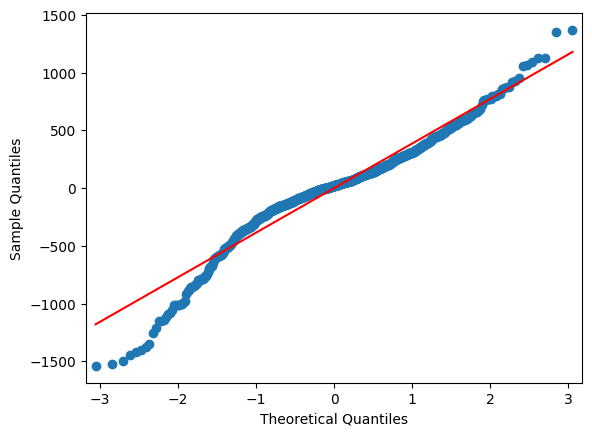

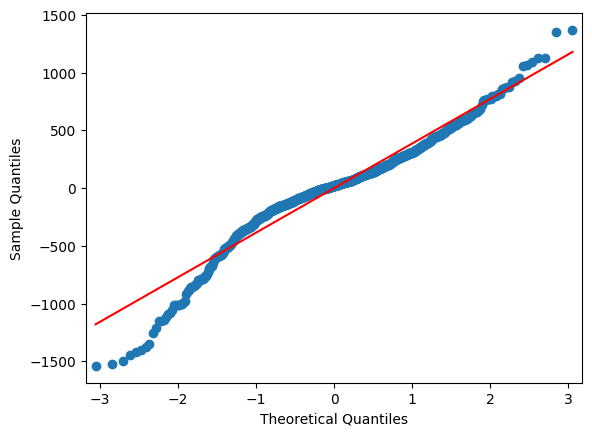

In [61]:
model_predictions = poly_model_fit.predict(poly_transform.fit_transform(X_val))

sm.qqplot(poly_model_fit.resid, line = 's')

In [63]:
training_data = combined_cyclist_data[combined_cyclist_data.Date < datetime(year = 2017, month = 1, day = 1)]
validation_data = combined_cyclist_data[combined_cyclist_data.Date >= datetime(year = 2017, month = 1, day = 1) & (combined_cyclist_data.Date < datetime(year = 2018, month = 1, day = 1))]

TypeError: '<' not supported between instances of 'str' and 'datetime.datetime'

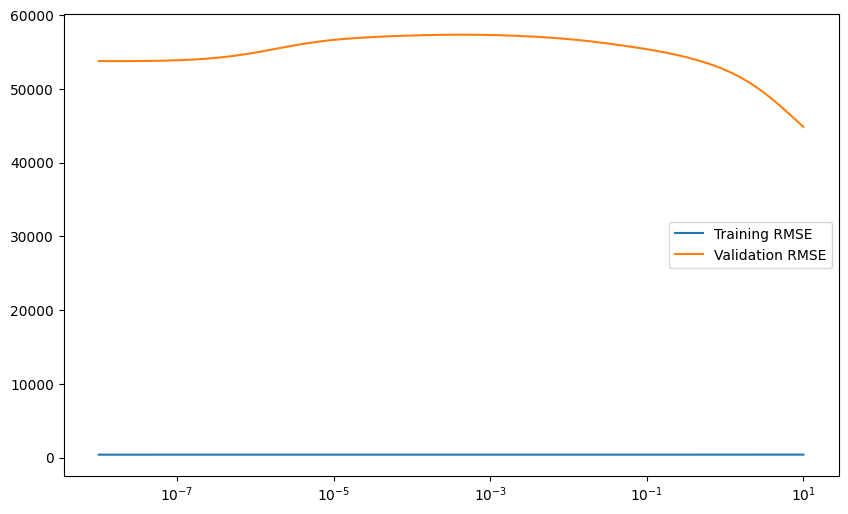

In [ ]:
lambdas = np.logspace(-8, 1, 1000)

rmse_train_values = []
rmse_validation_values = []

for l in lambdas:
    model = sm.OLS(Y_train, X_train_poly).fit_regularized(alpha=l, L1_wt=0)
    Y_train_predict = model.predict(X_train_poly)
    Y_test_predict = model.predict(X_test_poly)
    rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_predict))
    rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_predict))
    rmse_train_values.append(rmse_train)
    rmse_validation_values.append(rmse_test)

fig = plt.figure(figsize=[10, 6])
ax = fig.add_subplot(1, 1, 1)
ax.plot(lambdas, rmse_train_values, label='Training RMSE')
ax.plot(lambdas, rmse_validation_values, label='Validation RMSE')
# set x-axis to log scale
ax.set_xscale('log')
ax.legend()

### Plotting the RMSE 

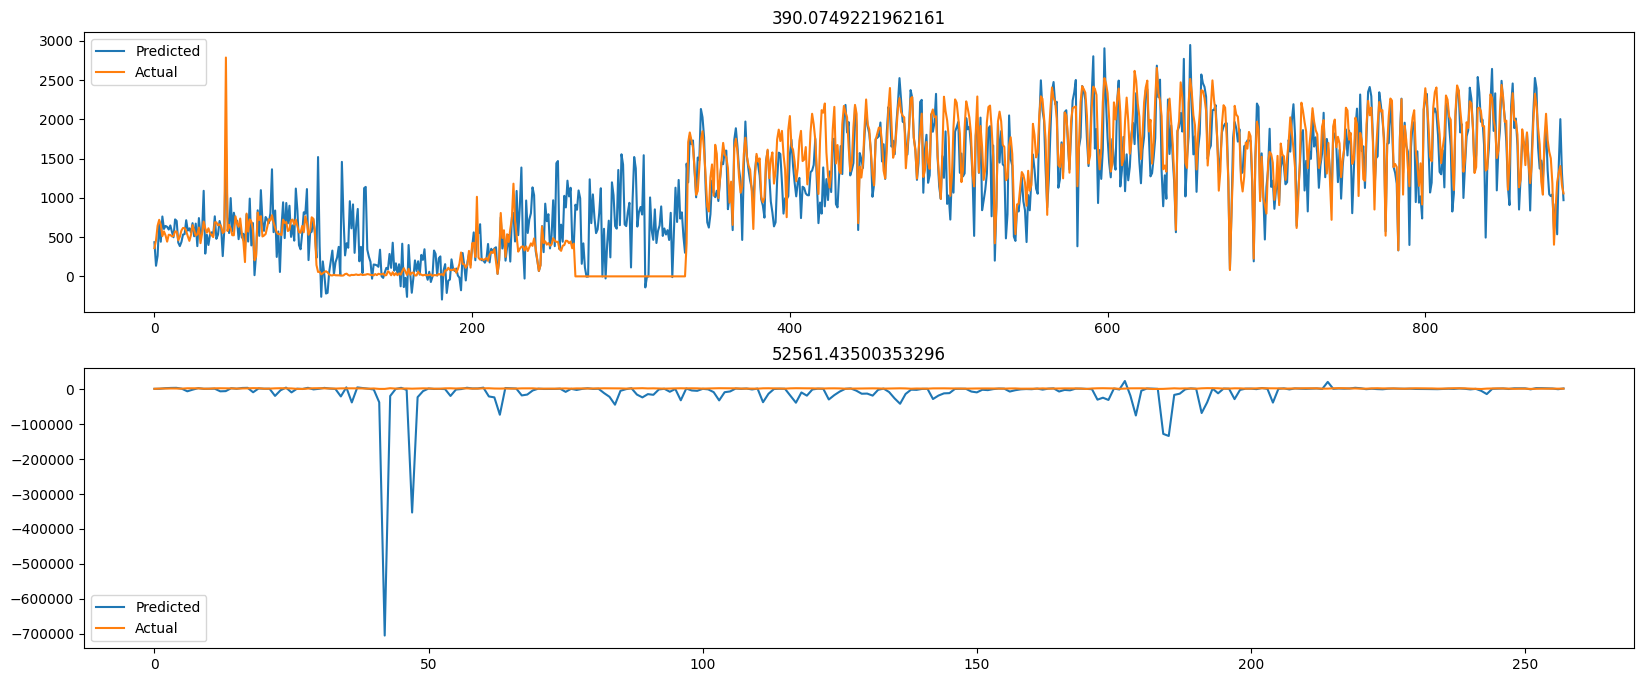

In [42]:
fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(2, 1, 1)
ax.plot(np.arange(len(Y_train_poly_predict)), Y_train_poly_predict, label='Predicted')
ax.plot(np.arange(len(Y_train_poly_predict)), Y_train, label='Actual')
ax.set_title(rmse_training)
ax.legend()
ax = fig.add_subplot(2, 1, 2)
ax.plot(np.arange(len(Y_test_poly_predict)), Y_test_poly_predict, label='Predicted')
ax.plot(np.arange(len(Y_test_poly_predict)), Y_test, label='Actual')
ax.set_title(rmse_testing)
ax.legend()

Rerunning the model with the best lambda

In [60]:
optimal_lambda = lambdas[np.argmin(rmse_validation_values)]
print(f'Optimal Lambda: {optimal_lambda}')

model = sm.OLS(Y_train, X_train_poly).fit_regularized(alpha=optimal_lambda, L1_wt=0)
Y_train_predict = model.predict(X_train_poly)

rmse_training_optimal_lambda = np.sqrt(mean_squared_error(Y_train, Y_train_poly_predict))
rmse_testing_optimal_lambda = np.sqrt(mean_squared_error(Y_test, Y_test_poly_predict))

print(f'RMSE Training: {rmse_training_optimal_lambda}')
print(f'RMSE Testing: {rmse_testing_optimal_lambda}')

Optimal Lambda: 10.0
RMSE Training: 502.70991938331855
RMSE Testing: 1081.6552228800288


## Problem 3 - LASSO Regression

In [67]:
trained_model_poly_lasso = sm.OLS(Y_train, X_train_poly).fit_regularized(alpha=1, L1_wt=1)

# Calculate R^2 value
Y_train_pred = trained_model_poly_lasso.predict(X_train_poly)
ss_res = np.sum((Y_train - Y_train_pred) ** 2)
ss_tot = np.sum((Y_train - np.mean(Y_train)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f'R^2: {r2}')

n = X_train_poly.shape[0]
p = X_train_poly.shape[1] - 1
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Adjusted R^2: {adjusted_r2}')

R^2: 0.5948294992828441
Adjusted R^2: 0.08553121084957438


In [68]:
Y_train_poly_predict = trained_model_poly_lasso.predict(X_train_poly)
Y_test_poly_predict = trained_model_poly_lasso.predict(X_test_poly)

rmse_training = np.sqrt(mean_squared_error(Y_train, Y_train_poly_predict))
rmse_testing = np.sqrt(mean_squared_error(Y_test, Y_test_poly_predict))

print(f'RMSE Training: {rmse_training}')
print(f'RMSE Testing: {rmse_testing}')

RMSE Training: 502.70991938331855
RMSE Testing: 1081.6552228800288


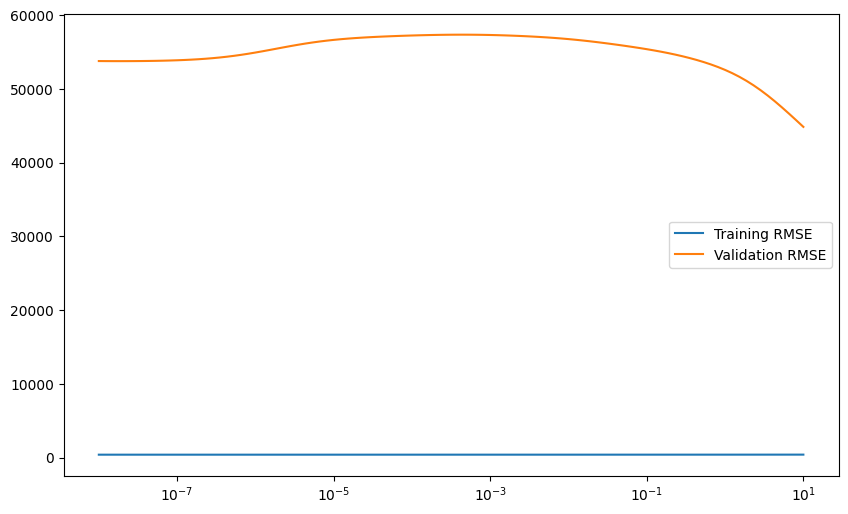

In [70]:
lambdas = np.logspace(-8, 1, 100)

rmse_train_values = []
rmse_validation_values = []

for l in lambdas:
    model = sm.OLS(Y_train, X_train_poly).fit_regularized(alpha=l, L1_wt=0)
    Y_train_predict = model.predict(X_train_poly)
    Y_test_predict = model.predict(X_test_poly)
    rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_predict))
    rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_predict))
    rmse_train_values.append(rmse_train)
    rmse_validation_values.append(rmse_test)

fig = plt.figure(figsize=[10, 6])
ax = fig.add_subplot(1, 1, 1)
ax.plot(lambdas, rmse_train_values, label='Training RMSE')
ax.plot(lambdas, rmse_validation_values, label='Validation RMSE')
# set x-axis to log scale
ax.set_xscale('log')
ax.legend()

### Plotting the RMSE

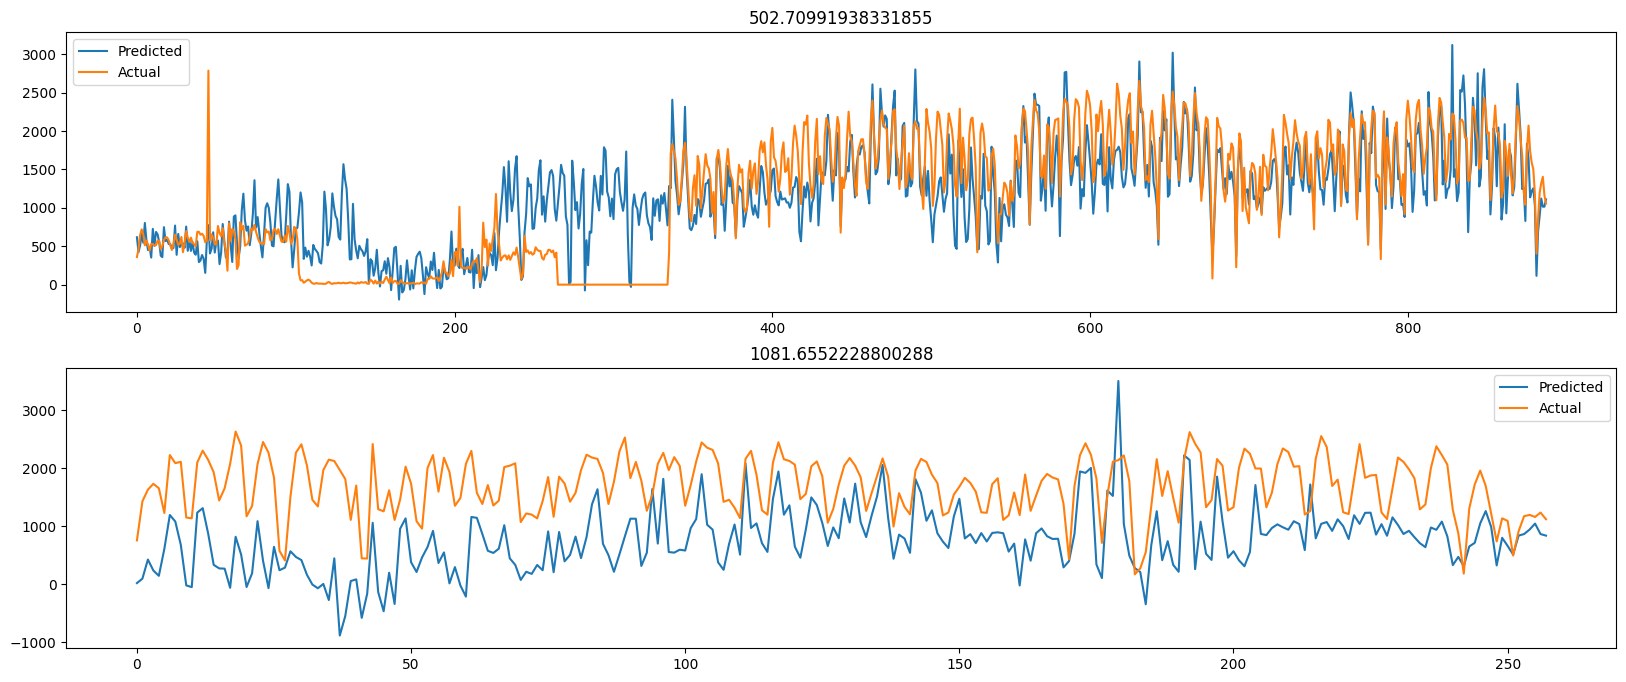

In [71]:
fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot(2, 1, 1)
ax.plot(np.arange(len(Y_train_poly_predict)), Y_train_poly_predict, label='Predicted')
ax.plot(np.arange(len(Y_train_poly_predict)), Y_train, label='Actual')
ax.set_title(rmse_training)
ax.legend()
ax = fig.add_subplot(2, 1, 2)
ax.plot(np.arange(len(Y_test_poly_predict)), Y_test_poly_predict, label='Predicted')
ax.plot(np.arange(len(Y_test_poly_predict)), Y_test, label='Actual')
ax.set_title(rmse_testing)
ax.legend()

Rerunning the model with the best lambda

In [72]:
optimal_lambda = lambdas[np.argmin(rmse_validation_values)]
print(f'Optimal Lambda: {optimal_lambda}')

model = sm.OLS(Y_train, X_train_poly).fit_regularized(alpha=optimal_lambda, L1_wt=0)
Y_train_predict = model.predict(X_train_poly)

rmse_training_optimal_lambda = np.sqrt(mean_squared_error(Y_train, Y_train_poly_predict))
rmse_testing_optimal_lambda = np.sqrt(mean_squared_error(Y_test, Y_test_poly_predict))

print(f'RMSE Training: {rmse_training_optimal_lambda}')
print(f'RMSE Testing: {rmse_testing_optimal_lambda}')

Optimal Lambda: 10.0
RMSE Training: 502.70991938331855
RMSE Testing: 1081.6552228800288
